* ###  | Author - Rahul Negi | 

# Student's-Perecentage-Prediction 

## Data : 
* Source - http://bit.ly/w-data

## Evaluation :
* Mean absolute error

## Features :
* Study Hours
* Percentage 


In [1]:
#importing required tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#importing training dataset
df = pd.read_csv('drive/My Drive/ML-DATA/student-scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Visualisation

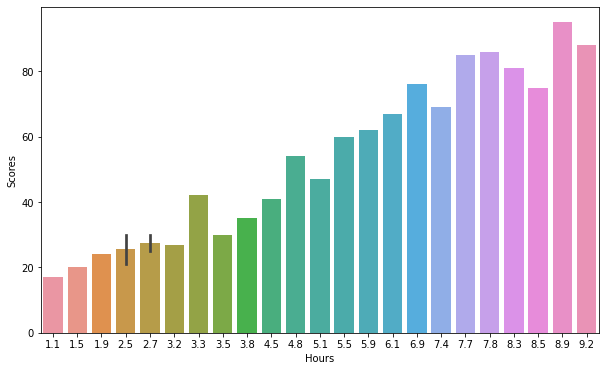

In [11]:
plt.figure(figsize=(10,6))
ax= sns.barplot(x= 'Hours',y = 'Scores', data=df)

As we can see the more hours student study, more score they can get 



### Training our model

* As we don't have much features available in this data set there's no requirement of feature engineerng 

* Data samples are less than 50 so 
best model will be LinearRegression

In [4]:
X = df.drop('Scores', axis=1)
y = df['Scores']

# Spliting the data

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state =0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9454906892105354

### What will be the score if a student studies for 9.5 hours/ day?

In [6]:
#let's find out
#predicting the data
preds = pd.DataFrame(columns=['Hours', 'Scores'])
preds['Hours'] = [9.5]
preds

,Hours,Scores
0,9.5,NaN


In [7]:
preds.shape 

(1, 2)

In [8]:
X_preds = preds['Hours']
predict = model.predict([X_preds])
all_pred = model.predict(X_test)
y_preds = '%.2f' % predict 
print(y_preds)

96.17


In [9]:
preds['Scores'] = y_preds
preds

,Hours,Scores
0,9.5,96.17


output = preds.to_csv('drive/My Drive/ML-DATA/predcted-score.csv', index= False)

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, all_pred)

4.183859899002982